### Import relevant libraries

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from pandas.tools.plotting import scatter_matrix
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
file = 'student-mat.csv'
df = pd.read_csv(file, delimiter=';')
pd.set_option('display.max_columns', None)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [11]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
df_copy = df.copy()

In [16]:
def pass_fail(data):
    grades = []
    for scores in data['G3']:
        if scores >= 10:
            scores = 'pass'
        else:
            scores = 'fail'
        grades.append(scores)
    data['finalExamGrade'] = grades
    return data

In [25]:
df_new = pass_fail(df_copy)
df_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,finalExamGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,pass


### Number of Male vs Female Students who failed in the final exam

In [29]:
attributes = ['sex', 'G3', 'finalExamGrade']
df_fail = df_new.loc[df_new['finalExamGrade']=='fail', attributes]
df_fail.head()

,sex,G3,finalExamGrade
0,F,6,fail
1,F,6,fail
7,F,6,fail
10,F,9,fail
18,M,5,fail


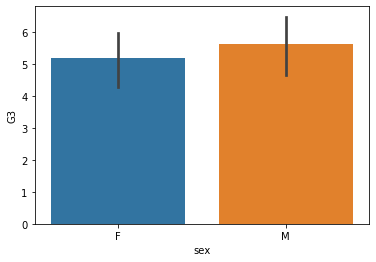

In [30]:
sns.barplot(x='sex', y='G3', data=df_fail)

### Number of Male vs Female Students who passed in the final exam

In [34]:
attributes = ['sex', 'G3', 'finalExamGrade']
df_pass = df_new.loc[df_new['finalExamGrade']=='pass', attributes]
df_pass.head()

,sex,G3,finalExamGrade
2,F,10,pass
3,F,15,pass
4,F,10,pass
5,M,15,pass
6,M,11,pass


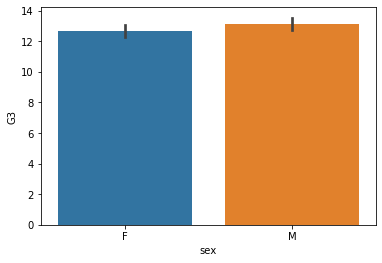

In [36]:
sns.barplot(x='sex', y='G3', data=df_pass)

### Number of Passes to Failures for the subject

In [160]:
df_new['finalExamGrade'].value_counts()

pass    265
fail    130
Name: finalExamGrade, dtype: int64

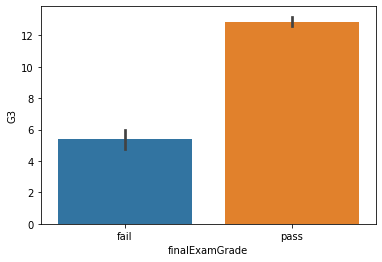

In [37]:
sns.barplot(x='finalExamGrade', y='G3', data=df_new)

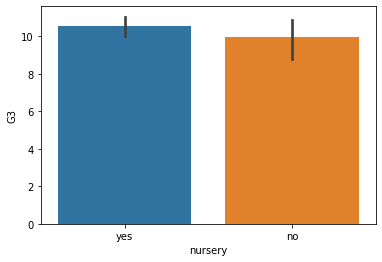

In [41]:
sns.barplot(x='nursery', y='G3', data=df_new)

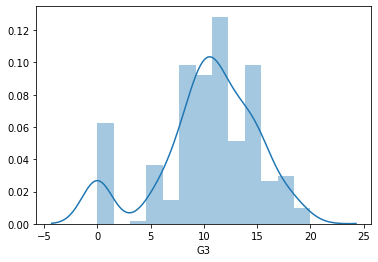

In [38]:
sns.distplot(df_new.G3)

### Relationship between absentism and Final Exam Score

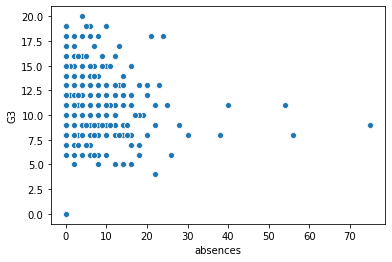

In [39]:
sns.scatterplot(x='absences', y='G3', data=df_new)

### Relationship between past subject failures and current subject score

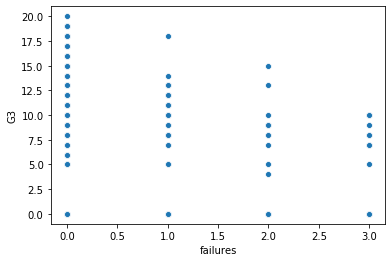

In [40]:
sns.scatterplot(x='failures', y='G3', data=df_new)

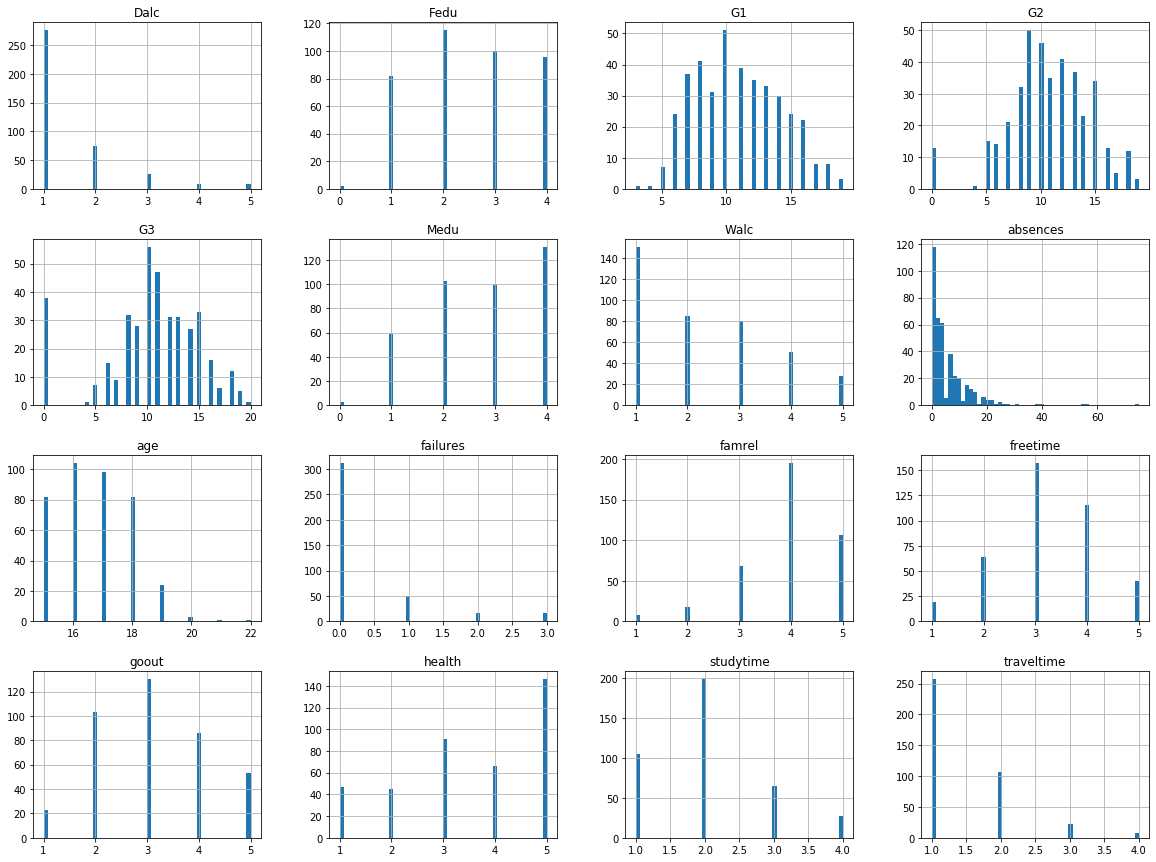

In [48]:
df_new.hist(bins=50, figsize=(20,15))
plt.show()

## Modelling

1. Try to select the most informant predictors.
2. Drop G3 from the data. It is target variable.
3. Standardise or normalise the numeric predictors.
4. Then reduce the dimensionality with PCA.
5. Segment predictors into:
    - personal (sex, age, address, famsize, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health, Dalc, Walc)
    - parent (Pstatus, Medu, Fedu, Mjob, Fjob, guardian)
    - academics (school, reason, traveltime, studytime, failures, schoolsup, famsup, paid, absences, G1, G2)

##### Experiments
1. Use all predictors without major changes (except scaling) to spotcheck algos. **- THE BASELINE**
2. Check for the informative power of each predictor to the target using p-value and other Statistical information.
3. Spotcheck algos with each segment predictors alone.
4. Feature selection alone and then spot check algos.
5. Feature extraction (PCA) alone and then spot check algos.
7. Feature selection + feature extraction (PCA) and then spot check algos.
8. Combine 2 segments and spotcheck algos (all variables, PCA only, feature selection only and combine both).

In [69]:
# split data to train and test
train, test = train_test_split(df_new, test_size=0.20, random_state=42)

In [71]:
# split data into predictors and target
x_train = train.drop(['G3', 'finalExamGrade'], axis=1)
y_train = train['finalExamGrade']

In [77]:
y_train.replace({'pass': 1, 'fail': 0}, inplace=True)
y_train.head()

C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


181    1
194    1
173    0
63     0
253    0
Name: finalExamGrade, dtype: int64

In [151]:
# transforms numerical variables and categorical variables separately and then concatenate them
def pipeline_transformer(num_features, nom_features, ord_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - You will first create 2 separate lists of variable names for the numerical variables and categorical variables.
    - num_features = list of numerical variable names
    - nom_features = list of nominal categorical variable names
    """
    num_pipe = Pipeline([('Scaler', StandardScaler())])
    nom_pipe = Pipeline([('OneHot', OneHotEncoder())])
    ord_pipe = Pipeline([('Ordinal', OrdinalEncoder([['LE3', 'GT3']]))])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_features),
                                   ('noms', nom_pipe, nom_features),
                                   ('ords', ord_pipe, ord_features)],
                                  remainder='passthrough')
    
    return full_pipe

### Baseline Experiment
- Use all predictors without major changes (except scaling) to spotcheck algos.

In [156]:
# instantiate numerical and ordinal and nominal feature names

# numerical features
num_var_names = ['age', 'absences', 'G1', 'G2']

# nominal features
nom_var_names = ['school', 'sex', 'address',
                 'Pstatus', 'Mjob', 'Fjob',
                 'reason', 'guardian', 'schoolsup',
                 'famsup', 'paid', 'activities',
                 'nursery', 'higher', 'internet',
                 'romantic']

# ordinal features
ord_var_names = ['famsize', 'Medu', 'Fedu',
                 'traveltime', 'studytime',
                 'failures', 'famrel',
                 'freetime', 'goout', 'Dalc',
                 'Walc', 'health']

# Preprocess the train set
pipeliner = pipeline_transformer(num_var_names,
                                 nom_var_names,
                                 ['famsize'])
new_train_preprocessed = pipeliner.fit_transform(x_train)
new_train_preprocessed

array([[-0.58639605, -0.46440769,  0.33205033, ...,  1.        ,
         2.        ,  3.        ],
       [-0.58639605, -0.70225668,  0.64340909, ...,  1.        ,
         1.        ,  3.        ],
       [-0.58639605, -0.70225668, -0.91338472, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 1.77915057,  1.08161077, -0.60202596, ...,  3.        ,
         3.        ,  5.        ],
       [ 0.20211949, -0.70225668,  0.64340909, ...,  1.        ,
         3.        ,  4.        ],
       [-1.37491159, -0.22655869, -0.2906672 , ...,  1.        ,
         1.        ,  5.        ]])

In [158]:
# define the model list
models = []


models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 42
num_fold = 3
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model,
                                 new_train_preprocessed,
                                 y_train,
                                 cv=kfold, scoring=scoring)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, cv_results.mean(),
                                   cv_results.std())
    print(see_results)

C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR: 0.970981 (0.007301)
GNB: 0.847678 (0.044222)
KNN: 0.849235 (0.020723)
SVR: 0.944851 (0.014478)


C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

CART: 0.895931 (0.033881)
SGD: 0.968432 (0.013004)


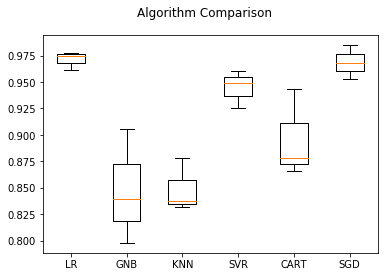

In [159]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Result analysis
1. Logistic Regression, SVM and SGD classifiers have the best average performances, in order.
2. They also happens to be the classifiers with the least variation with each cross validation, in the same order.

#### Check for the informative power of each predictor to the target using p-value and other Statistical information.

In [108]:
x_train_copy = x_train.copy()

In [110]:
# discretise the famsize to ordinal numbers: LE3=1, GT3=2
x_train_copy['famsize'].replace({'LE3':1, 'GT3':2}, inplace=True)
x_train_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
181,GP,M,16,U,2,T,3,3,services,other,home,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,4,2,3,1,2,3,2,12,13
194,GP,M,16,U,2,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0,13,14
173,GP,F,16,U,2,T,1,3,at_home,services,home,mother,1,2,3,no,no,no,yes,no,yes,yes,yes,4,3,5,1,1,3,0,8,7
63,GP,F,16,U,2,T,4,3,teacher,health,home,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,3,4,4,2,4,4,2,10,9
253,GP,M,16,R,2,T,2,1,other,other,course,mother,2,1,0,no,no,no,yes,no,yes,no,no,3,3,2,1,3,3,0,8,9


In [111]:
# Creating one hot encoding for the nominal categorical variables

#num_var = age, absences, G1, G2
#ord_var = famsize, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health

# nominal variables
nom_var_names = ['school', 'sex', 'address',
                 'Pstatus', 'Mjob', 'Fjob',
                 'reason', 'guardian', 'schoolsup',
                 'famsup', 'paid', 'activities',
                 'nursery', 'higher', 'internet',
                 'romantic']

x_train_dum = pd.get_dummies(x_train_copy, drop_first=True, columns=nom_var_names)
x_train_dum.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
181,16,2,3,3,1,2,0,4,2,3,1,2,3,2,12,13,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1
194,16,2,2,3,2,1,0,5,3,3,1,1,3,0,13,14,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
173,16,2,1,3,1,2,3,4,3,5,1,1,3,0,8,7,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
63,16,2,4,3,1,3,0,3,4,4,2,4,4,2,10,9,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0
253,16,2,2,1,2,1,0,3,3,2,1,3,3,0,8,9,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [214]:
x_train_dum = sm.add_constant(x_train_dum) # To explicitly specify the use of intercept in OLS method by adding a constant term
model = sm.GLM(y_train, x_train_dum).fit()
model.summary()

C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         finalExamGrade   No. Observations:                  316
Model:                            GLM   Df Residuals:                      274
Model Family:                Gaussian   Df Model:                           41
Link Function:               identity   Scale:                         0.10339
Method:                          IRLS   Log-Likelihood:                -67.311
Date:                Wed, 04 Nov 2020   Deviance:                       28.329
Time:                        16:04:04   Pearson chi2:                     28.3
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1605      0.407      0.395      0.693      -0.637       0.958
age                  -0.0335      0.019     -1.764      0.078      -0.071       0.004
famsize               0.0199      0.043      0.461      0.645      -0.065       0.105
Medu                 -0.0101      0.029     -0.350      0.727      -0.067       0.046
Fedu                  0.0199      0.024      0.816      0.414      -0.028       0.068
traveltime            0.0162      0.031      0.526      0.599      -0.044       0.077
studytime            -0.0194      0.027     -0.728      0.467      -0.072       0.033
failures             -0.0382      0.031     -1.246      0.213      -0.098       0.022
famrel                0.0357      0.023      1.576      0.115      -0.009       0.080
freetime              0.0075      0.021      0.360      0.719      -0.033       0.048
goout                -0.0320      0.021     -1.518      0.129      -0.073       0.009
Dalc                 -0.0049      0.029     -0.171      0.864      -0.061       0.051
Walc                  0.0135      0.022      0.615      0.539      -0.030       0.056
health                0.0077      0.014      0.546      0.585      -0.020       0.035
absences             -0.0026      0.002     -1.073      0.283      -0.007       0.002
G1                    0.0298      0.012      2.462      0.014       0.006       0.054
G2                    0.0644      0.010      6.551      0.000       0.045       0.084
school_MS            -0.0210      0.070     -0.300      0.764      -0.158       0.116
sex_M                 0.0116      0.046      0.253      0.800      -0.078       0.102
address_U            -0.0155      0.051     -0.306      0.760      -0.115       0.084
Pstatus_T            -0.0539      0.065     -0.823      0.411      -0.182       0.074
Mjob_health          -0.0499      0.099     -0.503      0.615      -0.245       0.145
Mjob_other           -0.0969      0.061     -1.593      0.111      -0.216       0.022
Mjob_services        -0.0221      0.067     -0.328      0.743      -0.154       0.110
Mjob_teacher         -0.1075      0.092     -1.165      0.244      -0.288       0.073
Fjob_health          -0.0826      0.121     -0.681      0.496      -0.321       0.155
Fjob_other            0.1017      0.086      1.178      0.239      -0.068       0.271
Fjob_services         0.0129      0.091      0.141      0.888      -0.166       0.192
Fjob_teacher          0.0184      0.115      0.160      0.873      -0.207       0.244
reason_home           0.0062      0.050      0.124      0.901      -0.091       0.104
reason_other          0.0359      0.070      0.510      0.610      -0.102       0.174
reason_reputation     0.0514      0.052      0.999      0.318      -0.050       0.152
guardian_mother       0.0026      0.049      0.053      0.958      -0.094

# Result
1. Only the two period grades (G1 and G2) are statistically significant variables.
2. The log odds for the 'final exam grade' increases by **0.0298 for every unit of G1** and by **0.0644 for every unit of G2** (if each and every other variable is left constant).

### Experiment 1
- Spotcheck algos with each segment predictors alone (also perform PCA and feature selection).
1. Segment predictors into:
    - personal (sex, age, address, famsize, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health, Dalc, Walc)
    - parent (Pstatus, Medu, Fedu, Mjob, Fjob, guardian)
    - academics (school, reason, traveltime, studytime, failures, schoolsup, famsup, paid, absences, G1, G2)

#### 1.1 for personal predictors
- personal (sex, age, address, famsize, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health, Dalc, Walc)

In [169]:
x_train_copy = x_train.copy()

In [170]:
# subset out the relevant features
personal_var = ['sex', 'age', 'address',
                'famsize', 'activities',
                'nursery', 'higher',
                'internet', 'romantic',
                'famrel', 'freetime',
                'goout', 'health']

x_train_personal = x_train_copy.loc[:, personal_var]
x_train_personal.head()

,sex,age,address,famsize,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health
181,M,16,U,GT3,yes,yes,yes,yes,yes,4,2,3,3
194,M,16,U,GT3,no,yes,yes,yes,no,5,3,3,3
173,F,16,U,GT3,yes,no,yes,yes,yes,4,3,5,3
63,F,16,U,GT3,yes,yes,yes,yes,no,3,4,4,4
253,M,16,R,GT3,yes,no,yes,no,no,3,3,2,3


In [171]:
# transforms numerical variables and categorical variables separately and then concatenate them
def pipeline_transformer(num_features, nom_features, ord_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - You will first create 2 separate lists of variable names for the numerical variables and categorical variables.
    - num_features = list of numerical variable names
    - nom_features = list of nominal categorical variable names
    """
    num_pipe = Pipeline([('Scaler', StandardScaler())])
    nom_pipe = Pipeline([('OneHot', OneHotEncoder())])
    ord_pipe = Pipeline([('Ordinal', OrdinalEncoder([['LE3', 'GT3']]))])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_features),
                                   ('noms', nom_pipe, nom_features),
                                   ('ords', ord_pipe, ord_features)],
                                  remainder='passthrough')
    
    return full_pipe

In [172]:
# instantiate numerical and ordinal and nominal feature names

# numerical features
num_var_names = ['age']

# nominal features
nom_var_names = ['sex', 'address',
                 'activities', 'nursery',
                 'higher', 'internet',
                 'romantic']

# ordinal features
ord_var_names = ['famsize', 'famrel',
                 'freetime', 'goout',
                 'health']

# Preprocess the train set
pipeliner = pipeline_transformer(num_var_names,
                                 nom_var_names,
                                 ['famsize'])
new_train_preprocessed = pipeliner.fit_transform(x_train_personal)
new_train_preprocessed

array([[-0.58639605,  0.        ,  1.        , ...,  2.        ,
         3.        ,  3.        ],
       [-0.58639605,  0.        ,  1.        , ...,  3.        ,
         3.        ,  3.        ],
       [-0.58639605,  1.        ,  0.        , ...,  3.        ,
         5.        ,  3.        ],
       ...,
       [ 1.77915057,  1.        ,  0.        , ...,  3.        ,
         5.        ,  5.        ],
       [ 0.20211949,  1.        ,  0.        , ...,  4.        ,
         3.        ,  4.        ],
       [-1.37491159,  0.        ,  1.        , ...,  3.        ,
         3.        ,  5.        ]])

In [176]:
# define the model list
models = []


models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 42
num_fold = 3
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model,
                                 new_train_preprocessed,
                                 y_train,
                                 cv=kfold, scoring=scoring)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, cv_results.mean(),
                                   cv_results.std())
    print(see_results)

LR: 0.631678 (0.034193)
GNB: 0.608645 (0.023322)
KNN: 0.585344 (0.106536)
SVR: 0.598443 (0.027832)
CART: 0.550914 (0.058661)
SGD: 0.609000 (0.011282)


C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "

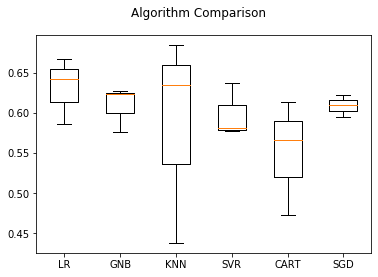

In [177]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 1.2 for Parent predictors
- parent (Pstatus, Medu, Fedu, Mjob, Fjob, guardian)

In [179]:
# subset out the relevant features
parents_var = ['Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian']

x_train_parents = x_train_copy.loc[:, parents_var]
x_train_parents.head()

,Pstatus,Medu,Fedu,Mjob,Fjob,guardian
181,T,3,3,services,other,mother
194,T,2,3,other,other,father
173,T,1,3,at_home,services,mother
63,T,4,3,teacher,health,mother
253,T,2,1,other,other,mother


In [180]:
# transforms numerical variables and categorical variables separately and then concatenate them
def pipeline_transformer(nom_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - nom_features = list of nominal categorical variable names
    """
    nom_pipe = Pipeline([('OneHot', OneHotEncoder())])
    
    full_pipe = ColumnTransformer([('noms', nom_pipe,
                                    nom_features)],
                                  remainder='passthrough')
    
    return full_pipe

In [181]:
# instantiate ordinal and nominal feature names

# nominal features
nom_var_names = ['Pstatus', 'Mjob', 'Fjob',
                 'guardian']

# ordinal features
ord_var_names = ['Medu', 'Fedu']

# Preprocess the train set
pipeliner = pipeline_transformer(nom_var_names)
new_train_preprocessed = pipeliner.fit_transform(x_train_parents)
new_train_preprocessed

array([[0., 1., 0., ..., 0., 3., 3.],
       [0., 1., 0., ..., 0., 2., 3.],
       [0., 1., 1., ..., 0., 1., 3.],
       ...,
       [0., 1., 0., ..., 1., 3., 3.],
       [0., 1., 0., ..., 0., 4., 3.],
       [0., 1., 0., ..., 0., 4., 4.]])

In [182]:
# define the model list
models = []


models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 42
num_fold = 3
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model,
                                 new_train_preprocessed,
                                 y_train,
                                 cv=kfold, scoring=scoring)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, cv_results.mean(),
                                   cv_results.std())
    print(see_results)

LR: 0.487363 (0.010905)
GNB: 0.498005 (0.008773)
KNN: 0.524606 (0.028985)
SVR: 0.487046 (0.007367)
CART: 0.501342 (0.025015)
SGD: 0.509100 (0.051621)


C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "

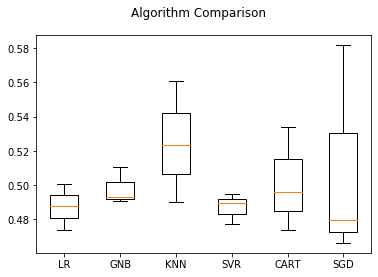

In [183]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 1.3 For Academics Predictors
- academics (school, reason, traveltime, studytime, failures, schoolsup, famsup, paid, absences, G1, G2)

In [184]:
x_train_copy.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
181,GP,M,16,U,GT3,T,3,3,services,other,home,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,4,2,3,1,2,3,2,12,13
194,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0,13,14
173,GP,F,16,U,GT3,T,1,3,at_home,services,home,mother,1,2,3,no,no,no,yes,no,yes,yes,yes,4,3,5,1,1,3,0,8,7
63,GP,F,16,U,GT3,T,4,3,teacher,health,home,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,3,4,4,2,4,4,2,10,9
253,GP,M,16,R,GT3,T,2,1,other,other,course,mother,2,1,0,no,no,no,yes,no,yes,no,no,3,3,2,1,3,3,0,8,9


In [185]:
# subset out the relevant features
academics_var = ['school', 'reason', 'traveltime',
               'studytime', 'failures', 'schoolsup',
               'famsup', 'paid', 'absences', 'G1', 'G2']

x_train_academics = x_train_copy.loc[:, academics_var]
x_train_academics.head()

,school,reason,traveltime,studytime,failures,schoolsup,famsup,paid,absences,G1,G2
181,GP,home,1,2,0,no,no,yes,2,12,13
194,GP,home,2,1,0,no,no,no,0,13,14
173,GP,home,1,2,3,no,no,no,0,8,7
63,GP,home,1,3,0,yes,yes,yes,2,10,9
253,GP,course,2,1,0,no,no,no,0,8,9


In [186]:
# transforms numerical variables and categorical variables separately and then concatenate them
def pipeline_transformer(num_features, nom_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - You will first create 2 separate lists of variable names for the numerical variables and categorical variables.
    - num_features = list of numerical variable names
    - nom_features = list of nominal categorical variable names
    """
    num_pipe = Pipeline([('Scaler', StandardScaler())])
    nom_pipe = Pipeline([('OneHot', OneHotEncoder())])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_features),
                                   ('noms', nom_pipe, nom_features)],
                                  remainder='passthrough')
    
    return full_pipe

In [187]:
# instantiate numerical and ordinal and nominal feature names

# numerical features
num_var_names = ['absences', 'G1', 'G2']

# nominal features
nom_var_names = ['school', 'reason',
                 'schoolsup', 'famsup',
                 'paid']

# ordinal features
ord_var_names = ['traveltime', 'studytime',
                 'failures']

# Preprocess the train set
pipeliner = pipeline_transformer(num_var_names,
                                 nom_var_names)
new_train_preprocessed = pipeliner.fit_transform(x_train_academics)
new_train_preprocessed

array([[-0.46440769,  0.33205033,  0.62616324, ...,  1.        ,
         2.        ,  0.        ],
       [-0.70225668,  0.64340909,  0.89283114, ...,  2.        ,
         1.        ,  0.        ],
       [-0.70225668, -0.91338472, -0.97384417, ...,  1.        ,
         2.        ,  3.        ],
       ...,
       [ 1.08161077, -0.60202596, -0.44050837, ...,  1.        ,
         2.        ,  2.        ],
       [-0.70225668,  0.64340909,  1.15949904, ...,  1.        ,
         3.        ,  0.        ],
       [-0.22655869, -0.2906672 ,  0.62616324, ...,  1.        ,
         1.        ,  0.        ]])

In [188]:
# define the model list
models = []

models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 42
num_fold = 3
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model,
                                 new_train_preprocessed,
                                 y_train,
                                 cv=kfold, scoring=scoring)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, cv_results.mean(),
                                   cv_results.std())
    print(see_results)

LR: 0.965629 (0.007649)
GNB: 0.934816 (0.014174)
KNN: 0.909032 (0.005499)
SVR: 0.947362 (0.010121)
CART: 0.899820 (0.045653)
SGD: 0.961503 (0.013218)


C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "

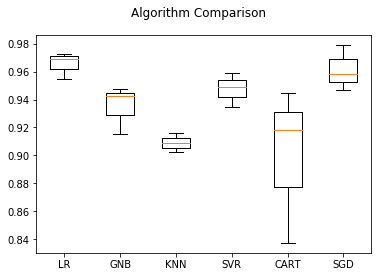

In [189]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Experiment 2
- Fit model on the two grades predictors (G1 and G2) only.

In [227]:
x_train_g = x_train.iloc[:, 30:32]
x_train_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 181 to 102
Data columns (total 2 columns):
G1    316 non-null int64
G2    316 non-null int64
dtypes: int64(2)
memory usage: 7.4 KB


In [228]:
# define the model list
models = []

models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 42
num_fold = 3
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model,
                                 x_train_g,
                                 y_train,
                                 cv=kfold, scoring=scoring)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, cv_results.mean(),
                                   cv_results.std())
    print(see_results)

LR: 0.966421 (0.022218)
GNB: 0.962717 (0.009439)
KNN: 0.966371 (0.013104)
SVR: 0.925046 (0.054409)
CART: 0.947889 (0.021892)
SGD: 0.973671 (0.013632)


C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "

### Experiment 3
- Combine 'parents' and 'personal' predictors and spotcheck algos (all variables, PCA only, feature selection only and combine both).
- Personal predictors: sex, age, address, famsize, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health, Dalc, Walc.
- Parent predictors: Pstatus, Medu, Fedu, Mjob, Fjob, guardian.

In [232]:

pers_par_var_names = ['sex', 'age', 'address',
                      'famsize', 'activities',
                      'nursery', 'higher',
                      'internet', 'romantic',
                      'famrel', 'freetime',
                      'goout', 'health',
                      'Pstatus', 'Medu',
                      'Fedu', 'Mjob',
                      'Fjob', 'guardian',
                      'Dalc', 'Walc']

pers_par_var_train = x_train.loc[:, pers_par_var_names]
pers_par_var_train.head()

,sex,age,address,famsize,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,Dalc,Walc
181,M,16,U,GT3,yes,yes,yes,yes,yes,4,2,3,3,T,3,3,services,other,mother,1,2
194,M,16,U,GT3,no,yes,yes,yes,no,5,3,3,3,T,2,3,other,other,father,1,1
173,F,16,U,GT3,yes,no,yes,yes,yes,4,3,5,3,T,1,3,at_home,services,mother,1,1
63,F,16,U,GT3,yes,yes,yes,yes,no,3,4,4,4,T,4,3,teacher,health,mother,2,4
253,M,16,R,GT3,yes,no,yes,no,no,3,3,2,3,T,2,1,other,other,mother,1,3


In [233]:
# transforms numerical variables and categorical variables separately and then concatenate them
def pipeline_transformer(num_features, nom_features, ord_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - You will first create 2 separate lists of variable names for the numerical variables and categorical variables.
    - num_features = list of numerical variable names
    - nom_features = list of nominal categorical variable names
    """
    num_pipe = Pipeline([('Scaler', StandardScaler())])
    nom_pipe = Pipeline([('OneHot', OneHotEncoder())])
    ord_pipe = Pipeline([('Ordinal', OrdinalEncoder([['LE3', 'GT3']]))])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_features),
                                   ('noms', nom_pipe, nom_features),
                                   ('ords', ord_pipe, ord_features)],
                                  remainder='passthrough')
    
    return full_pipe

In [236]:
# instantiate numerical and ordinal and nominal feature names

# numerical features
num_var_names = ['age']

# nominal features
nom_var_names = ['sex', 'address',
                 'Pstatus', 'Mjob', 'Fjob',
                 'guardian', 'activities',
                 'nursery', 'higher', 'internet',
                 'romantic']

# ordinal features
ord_var_names = ['famsize', 'Medu', 'Fedu','famrel',
                 'freetime', 'goout', 'Dalc',
                 'Walc', 'health']

# Preprocess the train set
pipeliner = pipeline_transformer(num_var_names,
                                 nom_var_names,
                                 ['famsize'])
new_train_preprocessed = pipeliner.fit_transform(pers_par_var_train)
new_train_preprocessed

array([[-0.58639605,  0.        ,  1.        , ...,  3.        ,
         1.        ,  2.        ],
       [-0.58639605,  0.        ,  1.        , ...,  3.        ,
         1.        ,  1.        ],
       [-0.58639605,  1.        ,  0.        , ...,  3.        ,
         1.        ,  1.        ],
       ...,
       [ 1.77915057,  1.        ,  0.        , ...,  3.        ,
         3.        ,  3.        ],
       [ 0.20211949,  1.        ,  0.        , ...,  3.        ,
         1.        ,  3.        ],
       [-1.37491159,  0.        ,  1.        , ...,  4.        ,
         1.        ,  1.        ]])

In [237]:
# define the model list
models = []


models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVR', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 42
num_fold = 3
scoring = 'roc_auc'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model,
                                 new_train_preprocessed,
                                 y_train,
                                 cv=kfold, scoring=scoring)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, cv_results.mean(),
                                   cv_results.std())
    print(see_results)

LR: 0.563117 (0.013524)
GNB: 0.540311 (0.029604)
KNN: 0.576379 (0.040110)
SVR: 0.574757 (0.011795)
CART: 0.524560 (0.049434)
SGD: 0.558623 (0.026090)


C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "

# Analysis

#### Results
1. Training on full predictors and on 'academics predictors' only have the best results.
2. All linear models tends to performed slight better when trained on all predictors than on only the 'academics predictors' only with Logistic Regression having the best result.
3. KNN, Gaussian Naive Bayes improved when trained on only academics predictors only over when trained on all predictors. However, the better performing algorithm among the two (Gaussian Naive Bayes- 0.934816) wasn't as good as Logistic Regression's performance using the same set of predictors ('academics predictors').

#### Insights
1. Using only academics predictors, these are predictors that could easily be available and still provide substantially good results across many algorithms.
2. We might be able to improve the performance of algorithms on the 'academics predictors' only by ensembling them.

#### Conclusion
1. We should focus more on getting academics-related predictors.
2. We could try combining two set of predictors (e.g. academics and personal predictors) and measure performance.

# Retrain the best performing algorithm on the full data and test on the test data

In [200]:
# transforms numerical variables and categorical variables separately and then concatenate them
def pipeline_transformer(num_features, nom_features, ord_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - You will first create 2 separate lists of variable names for the numerical variables and categorical variables.
    - num_features = list of numerical variable names
    - nom_features = list of nominal categorical variable names
    """
    num_pipe = Pipeline([('Scaler', StandardScaler())])
    nom_pipe = Pipeline([('OneHot', OneHotEncoder())])
    ord_pipe = Pipeline([('Ordinal', OrdinalEncoder([['LE3', 'GT3']]))])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_features),
                                   ('noms', nom_pipe, nom_features),
                                   ('ords', ord_pipe, ord_features)],
                                  remainder='passthrough')
    
    return full_pipe

In [202]:
# instantiate numerical and ordinal and nominal feature names

# numerical features
num_var_names = ['age', 'absences', 'G1', 'G2']

# nominal features
nom_var_names = ['school', 'sex', 'address',
                 'Pstatus', 'Mjob', 'Fjob',
                 'reason', 'guardian', 'schoolsup',
                 'famsup', 'paid', 'activities',
                 'nursery', 'higher', 'internet',
                 'romantic']

# ordinal features
ord_var_names = ['famsize', 'Medu', 'Fedu',
                 'traveltime', 'studytime',
                 'failures', 'famrel',
                 'freetime', 'goout', 'Dalc',
                 'Walc', 'health']

# Preprocess the train set
pipeliner = pipeline_transformer(num_var_names,
                                 nom_var_names,
                                 ['famsize'])
new_train_preprocessed = pipeliner.fit_transform(x_train)
new_train_preprocessed

array([[-0.58639605, -0.46440769,  0.33205033, ...,  1.        ,
         2.        ,  3.        ],
       [-0.58639605, -0.70225668,  0.64340909, ...,  1.        ,
         1.        ,  3.        ],
       [-0.58639605, -0.70225668, -0.91338472, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 1.77915057,  1.08161077, -0.60202596, ...,  3.        ,
         3.        ,  5.        ],
       [ 0.20211949, -0.70225668,  0.64340909, ...,  1.        ,
         3.        ,  4.        ],
       [-1.37491159, -0.22655869, -0.2906672 , ...,  1.        ,
         1.        ,  5.        ]])

In [194]:
test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,finalExamGrade
78,GP,M,17,U,GT3,T,2,1,other,other,home,mother,2,1,3,yes,yes,no,yes,yes,no,yes,no,4,5,1,1,1,3,2,8,8,10,pass
371,MS,M,18,R,LE3,T,1,2,at_home,services,other,father,3,1,0,no,yes,yes,yes,yes,no,yes,yes,4,3,3,2,3,3,3,14,12,12,pass
248,GP,M,18,R,LE3,T,3,3,other,services,course,mother,1,2,1,no,yes,no,no,yes,yes,yes,yes,4,3,3,1,3,5,8,3,5,5,fail
55,GP,F,16,U,GT3,A,2,1,other,other,other,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,5,3,4,1,1,2,8,8,9,10,pass
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,fail


In [203]:
# split test data to predictors and target
x_test = test.drop(['G3', 'finalExamGrade'], axis=1)
y_test = test['finalExamGrade']
x_test.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
78,GP,M,17,U,GT3,T,2,1,other,other,home,mother,2,1,3,yes,yes,no,yes,yes,no,yes,no,4,5,1,1,1,3,2,8,8
371,MS,M,18,R,LE3,T,1,2,at_home,services,other,father,3,1,0,no,yes,yes,yes,yes,no,yes,yes,4,3,3,2,3,3,3,14,12


In [210]:
y_test.replace({'pass': 1, 'fail': 0}, inplace=True)
y_test.head()

C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


78     1
371    1
248    0
55     1
390    0
Name: finalExamGrade, dtype: int64

In [204]:
# preprocess the test predictors
new_test_preprocessed = pipeliner.transform(x_test)
new_test_preprocessed

array([[ 0.20211949, -0.46440769, -0.91338472, ...,  1.        ,
         1.        ,  3.        ],
       [ 0.99063503, -0.34548319,  0.95476785, ...,  2.        ,
         3.        ,  3.        ],
       [ 0.99063503,  0.24913929, -2.47017853, ...,  1.        ,
         3.        ,  5.        ],
       ...,
       [-1.37491159,  0.24913929, -0.60202596, ...,  1.        ,
         1.        ,  5.        ],
       [-1.37491159, -0.46440769,  1.26612661, ...,  1.        ,
         1.        ,  5.        ],
       [ 0.20211949,  1.20053527, -1.53610225, ...,  2.        ,
         4.        ,  5.        ]])

In [205]:
# Fit Logistic Regression
lr = LogisticRegression()
lr.fit(new_train_preprocessed, y_train)

C:\Users\iDAFAdmin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
# Predict the test set
test_pred = lr.predict(new_test_preprocessed)

In [211]:
# evaluate its performance
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

[[24  3]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.94      0.90      0.92        52

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79



### Result
1. We want to reduce false positive (in this case, FP = 3) as much as possible. So that the school could intervene students that are prone to fail with good precision.